# Import Required Libraries
Import the necessary libraries, including NumPy, Matplotlib, and Scikit-learn.

In [6]:
# Import Required Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression

# Define RANSAC Algorithm
Write a Python function to implement the RANSAC algorithm for robust linear regression.

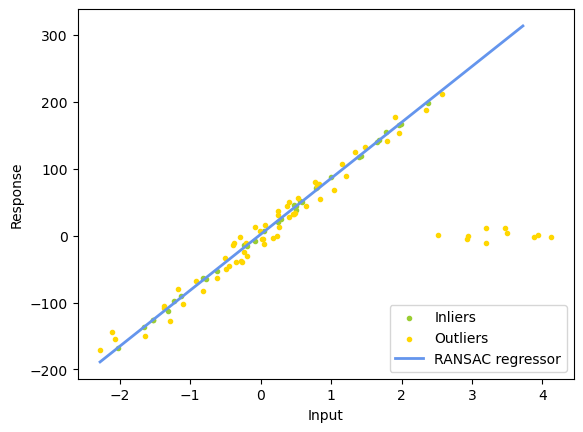

In [7]:
# Define RANSAC Algorithm

def ransac_algorithm(X, y, max_trials=100, min_samples=2, residual_threshold=5.0):
    """
    Implement the RANSAC algorithm for robust linear regression.
    
    Parameters:
    X: array-like, shape (n_samples, n_features)
        The input data.
    y: array-like, shape (n_samples,)
        The target values.
    max_trials: int, optional (default=100)
        The maximum number of iterations for random sample selection.
    min_samples: int, optional (default=2)
        The minimum number of samples chosen randomly from original data.
    residual_threshold: float, optional (default=5.0)
        Maximum residual for a data sample to be classified as an inlier.
    
    Returns:
    model: object
        The fitted linear model.
    inlier_mask: array-like, shape (n_samples,)
        Boolean mask of inliers classified by RANSAC.
    """
    
    # Initialize the RANSAC regressor
    ransac = RANSACRegressor(max_trials=max_trials, min_samples=min_samples, residual_threshold=residual_threshold)
    
    # Fit the model to the data
    ransac.fit(X, y)
    
    # Get the inlier mask
    inlier_mask = ransac.inlier_mask_
    
    return ransac, inlier_mask

# Example usage with synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10)
# Add some outliers
np.random.seed(0)
X[:10] = 3 + 0.5 * np.random.normal(size=(10, 1))
y[:10] = -3 + 10 * np.random.normal(size=10)

# Apply the RANSAC algorithm
model, inliers = ransac_algorithm(X, y)

# Plot the results
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = model.predict(line_X)

plt.scatter(X[inliers], y[inliers], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[~inliers], y[~inliers], color='gold', marker='.', label='Outliers')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=2, label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

# Generate Synthetic Dataset
Create a synthetic dataset with known outliers using NumPy.

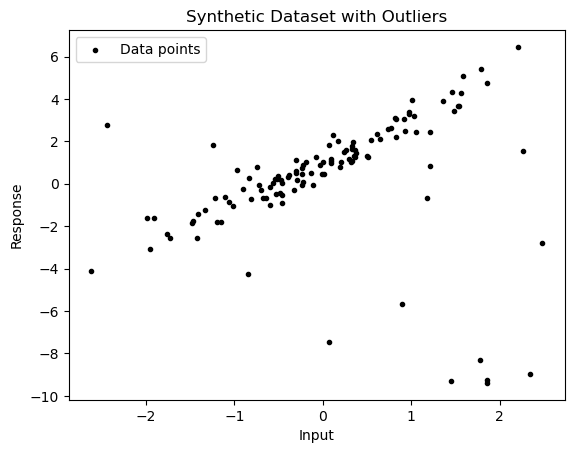

In [8]:
# Generate Synthetic Dataset

# Create a synthetic dataset with known outliers
np.random.seed(42)  # For reproducibility

# Generate inlier data
X_inliers = np.random.normal(0, 1, 100).reshape(-1, 1)
y_inliers = 2 * X_inliers.squeeze() + 1 + np.random.normal(0, 0.5, 100)

# Generate outlier data
X_outliers = np.random.uniform(-3, 3, 20).reshape(-1, 1)
y_outliers = np.random.uniform(-10, 10, 20)

# Combine inliers and outliers
X = np.vstack((X_inliers, X_outliers))
y = np.concatenate((y_inliers, y_outliers))

# Plot the synthetic dataset
plt.scatter(X, y, color='black', marker='.', label='Data points')
plt.xlabel("Input")
plt.ylabel("Response")
plt.title("Synthetic Dataset with Outliers")
plt.legend(loc='upper left')
plt.show()

# Apply RANSAC Algorithm
Use the defined RANSAC function to estimate the parameters of a linear model that best fits the inliers.

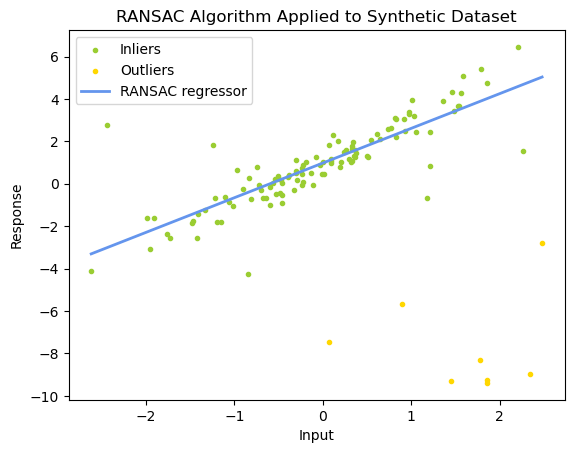

In [9]:
# Apply RANSAC Algorithm

# Use the defined RANSAC function to estimate the parameters of a linear model that best fits the inliers
model, inliers = ransac_algorithm(X, y)

# Generate line for plotting the RANSAC result
line_X = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
line_y_ransac = model.predict(line_X)

# Plot the inliers, outliers, and the fitted model
plt.scatter(X[inliers], y[inliers], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[~inliers], y[~inliers], color='gold', marker='.', label='Outliers')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=2, label='RANSAC regressor')
plt.xlabel("Input")
plt.ylabel("Response")
plt.legend(loc='upper left')
plt.title("RANSAC Algorithm Applied to Synthetic Dataset")
plt.show()

# Visualize Results
Visualize the inliers and outliers along with the fitted model using Matplotlib.

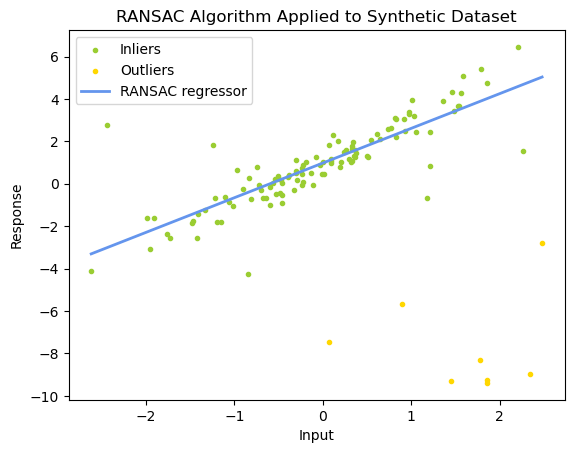

In [10]:
# Visualize Results

# Generate line for plotting the RANSAC result
line_X = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
line_y_ransac = model.predict(line_X)

# Plot the inliers, outliers, and the fitted model
plt.scatter(X[inliers], y[inliers], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[~inliers], y[~inliers], color='gold', marker='.', label='Outliers')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=2, label='RANSAC regressor')
plt.xlabel("Input")
plt.ylabel("Response")
plt.legend(loc='upper left')
plt.title("RANSAC Algorithm Applied to Synthetic Dataset")
plt.show()